In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from google.colab  import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
img_path = "/gdrive/My Drive/BitirmeTezi/Animals/"
labels=['bird','cat','dog']

In [ ]:
img_height, img_width = (369,469)
image_size = (img_height, img_width)
batch_size = 32

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    img_path,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=1,
    validation_split=0.3,
    subset='both',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 610 files belonging to 3 classes.
Using 427 files for training.
Using 183 files for validation.


In [ ]:
for image_batch, labels_batch in train_ds:
  X_train = image_batch.numpy()
  y_train = labels_batch.numpy()


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bird', 'cat', 'dog']


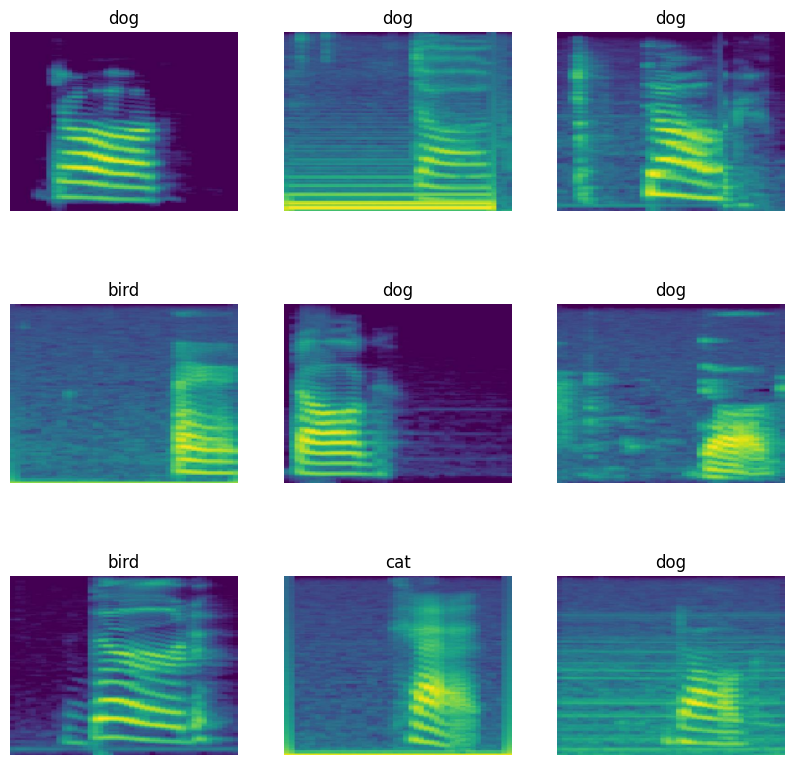

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 369, 469, 3)
(32,)


## **Burada Rescaling Layer kullanılabilir ancak autoencoder da olmaz çünkü xtrain verilseydi, normalize edilerek kullanılırdı ama çıkışta normalize edilmemiş xtrain ile karşılaştırılırdı !!!!!**

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 369, 469, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 369, 469, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 184, 234, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 184, 234, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 92, 117, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 92, 117, 64)      

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=9
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/9
14/14 [==============================] - 112s 8s/step - loss: 1.6329 - accuracy: 0.3138 - val_loss: 1.0817 - val_accuracy: 0.3224
Epoch 2/9
14/14 [==============================] - 97s 7s/step - loss: 1.0297 - accuracy: 0.4824 - val_loss: 0.9383 - val_accuracy: 0.6339
Epoch 3/9
14/14 [==============================] - 98s 7s/step - loss: 0.8800 - accuracy: 0.5902 - val_loss: 0.6911 - val_accuracy: 0.7869
Epoch 4/9
14/14 [==============================] - 109s 8s/step - loss: 0.6195 - accuracy: 0.7424 - val_loss: 0.3615 - val_accuracy: 0.8907
Epoch 5/9
14/14 [==============================] - 90s 6s/step - loss: 0.4496 - accuracy: 0.8220 - val_loss: 0.3176 - val_accuracy: 0.8743
Epoch 6/9
14/14 [==============================] - 101s 7s/step - loss: 0.3097 - accuracy: 0.8735 - val_loss: 0.3042 - val_accuracy: 0.8798
Epoch 7/9
14/14 [==============================] - 101s 7s/step - loss: 0.2689 - accuracy: 0.8876 - val_loss: 0.3012 - val_accuracy: 0.8907
Epoch 8/9
14/14 [======

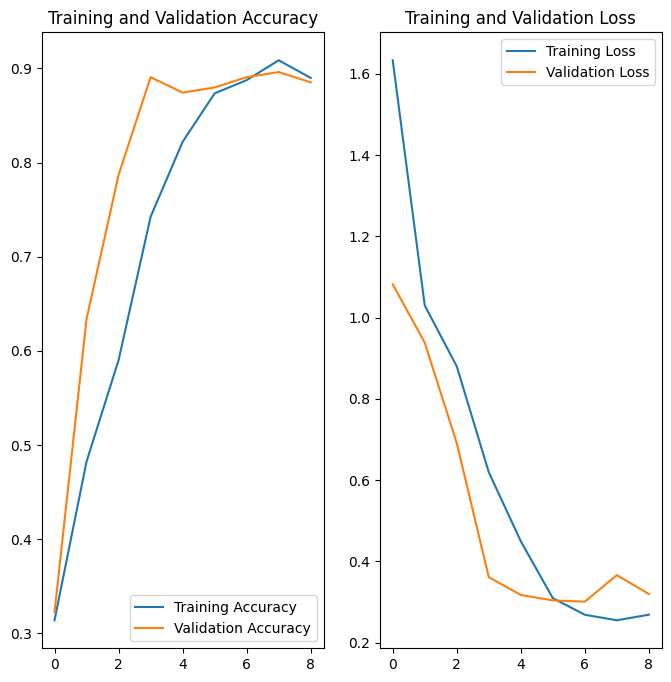

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()